### JDF - boundary condition analysis and transports

In [96]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [97]:
import netCDF4 as nc
from matplotlib import pyplot as plt
from salishsea_tools import (
    viz_tools)
import cmocean as cm
import numpy as np
import seawater
import arrow
import xarray as xr
import pickle

## Visualize where transports are output in the model

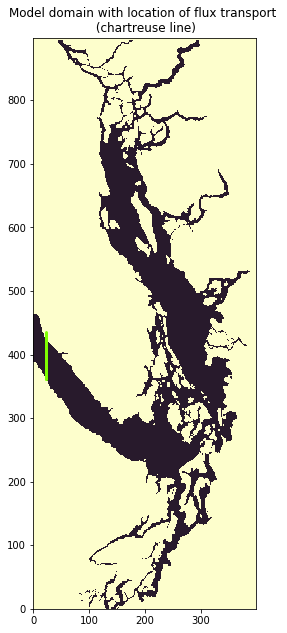

In [98]:
fact = 0.7
fig = plt.figure(figsize=(15*fact, 15*fact))
ax1 = plt.subplot2grid((1,1), (0,0), colspan=1, rowspan=1) 
bath = '/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc'
grid = nc.Dataset(bath)
viz_tools.set_aspect(ax1)   
fmask = (grid['fmask'][0,0,:,:])    
mesh = ax1.pcolormesh(fmask, vmin=0, vmax=1, cmap = cm.cm.deep)
# for i in range(370,480):
#     pts = ax1.scatter(5,i,s=3,c='red', marker='o')
    
for i in range(361,(361+75)):
    pts = ax1.scatter(23,i,s=3,c='chartreuse', marker='o')
    
w = plt.title('Model domain with location of flux transport \n (chartreuse line)')

In [99]:
tdir = '/data/sallen/results/MEOPAR/averages/hindcast.201905/'

##### code commented out to calculate sumstor_DIC 
        
        sumstor_DIC form: [yr (2013-2019), day (from June 1 to Sept 1) depth] 
        mean by-depth DIC in LiveOcean BC's for every summer day of every year between 2013-2019

In [100]:
# yrs = np.arange(2013,2020,1)

# sumstor_DIC = np.zeros([len(yrs),93,40])
# LO = '/results/forcing/LiveOcean/boundary_conditions/'

# for yr in yrs:
#     print(yr)
#     start =f'{yr}-06-01'
#     end =f'{yr}-09-01'

#     start_run = arrow.get(start)
#     end_run = arrow.get(end)
#     arrow_array2 = []

#     for r in arrow.Arrow.span_range('day', start_run, end_run):
#         arrow_array2.append(r)

#     for i in range(0,93):
#         if i%20 == 0:
#             print(i)

#         tdate = arrow_array2[i][0]
#         yy = tdate.format('YYYY')
#         mm = tdate.format('MM')
#         dd = tdate.format('DD')
#         strnam = f'LiveOcean_v201905_y{yy}m{mm}d{dd}.nc'
#         #print(strnam)
#         tdat = xr.open_dataset(LO+strnam)
#         DIC = tdat['DIC'][0,:,0,:]
#         sumstor_DIC[yr-2013,i,:]=np.nanmean(DIC, axis = 1) 
# pickle.dump(sumstor_DIC, open("sumstor_DIC.pkl", 'wb'))

In [101]:

sumstor_DIC = pickle.load(open('./sumstor_DIC.pkl', 'rb'))  

### DIC content of boundary conditions and its anomaly from all-year mean at 24, 76, 253, and 279 m 
##### from June 1 to Sept 1

    - increase in DIC at depth over the course of summer
    - anomalous dip in 2013 at both 24m and 76 m
    - 2013 is anomalous in surf. cond, 2015 is potentially slightly anomalous at depth 
    - no stark trends at first glance

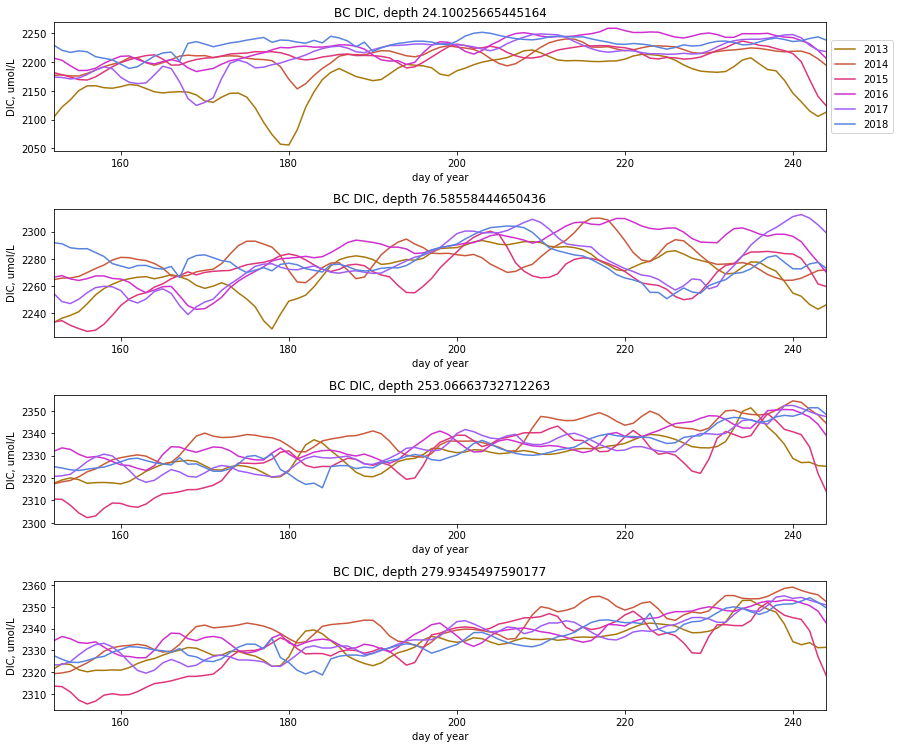

In [102]:
yrs = np.arange(2013,2019,1)
cmap = cm.cm.phase
dayr = np.arange(152,245,1)
depth = [20,25,32,33]
grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = (grid['gdept_1d'][0,:])
#print(depths)

fact = 0.7
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(18*fact, 15*fact))

for i in range(0,4):
    for yr in yrs:
        ax = axes[i]
        ax.plot(dayr,sumstor_DIC[yr-2013,:,depth[i]], color = cmap((yr-2013)/9), label = str(yr))
    ax.set_xlim([152,244])
    ax.set_ylabel('DIC, umol/L')
    ax.set_xlabel('day of year')
    ax.set_title(f'BC DIC, depth {depths[depth[i]]}')
    #ax.set_ylim([-120,120])
    if i == 0:
        ax.legend(bbox_to_anchor=[1, 0.9])
plt.tight_layout()

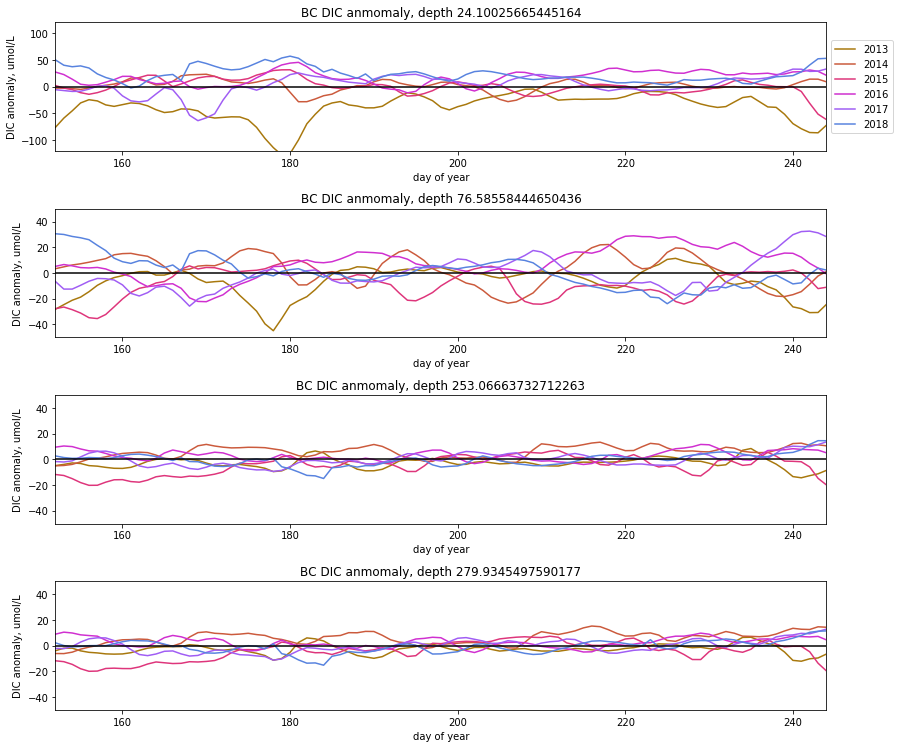

In [103]:
cmap = cm.cm.phase
dayr = np.arange(152,245,1)


fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(18*fact, 15*fact))

for i in range(0,4):
    for yr in yrs:
        ax = axes[i]
        ax.plot(dayr,(sumstor_DIC[yr-2013,:,depth[i]]
                      -np.nanmean(sumstor_DIC[:,:,depth[i]],axis = 0)),
                color = cmap((yr-2013)/9), label = str(yr))
    ax.set_xlim([152,244])
    ax.set_ylim([-120,120])
    ax.set_xlabel('day of year')
    ax.set_ylabel('DIC anomaly, umol/L')
    if i > 0:
        ax.set_ylim([-50,50])
    ax.axhline(y=0,color = 'k')
    if i == 0:
        ax.legend(bbox_to_anchor=[1, 0.9])
    ax.set_title(f'BC DIC anmomaly, depth {depths[depth[i]]}')

plt.tight_layout()

## calculating transports for one test day from physical transports at i = 23 (kg/s) and DIC content at the same place
    
    calculuation:
    
    input data:
        DIC (umol/L)
       density (kg/L)
       physical flux transport (kg/s)
       
       want to get, in each grid cell - mols per day
       
   
    mols/umol * umol/L * L/kg * kg/s * s/ hr to get flux per hour
    sum the 24 hourly fluxes to get mol/day
    


In [104]:
uflx_nc = nc.Dataset('/results2/SalishSea/hindcast.201905/26jan13/SalishSea_1h_20130126_20130126_flux_U.nc')
carp_nc = nc.Dataset('/results2/SalishSea/hindcast.201905/26jan13/SalishSea_1h_20130126_20130126_carp_T.nc')

# transport in kg/s at the i = 23, j = 361:361+75 boundary
u_transport = uflx_nc['u_masstr'][:,:,:,0]
# DIC concentration there
DIC = carp_nc['dissolved_inorganic_carbon'][:,:,361:(361+75),23]
#potential density sigma theta there in kg/L
sigma0 = (carp_nc['sigma_theta'][:,:,361:(361+75),23]+1000)/1000
#inverse of pot. dense in L/kg
inv_sigma0 = 1/sigma0
print('density: weight of a L of seawater')
print(sigma0[0,0,30])
print('inverse of that')
print(inv_sigma0[0,0,30])


#calculate C mol per hour
#mol/umol * umol/L * L/kg * kg/s * s/ hr to get flux per hour

C_hr =  1e-6 * DIC * inv_sigma0 * u_transport * (60*60)
#sum hourly flux to get umol C/day
C_day = np.nansum(C_hr, axis = 0)
print(np.shape(C_day))


density: weight of a L of seawater
1.0240283
inverse of that
0.9765355
(40, 75)


In [105]:
#size of a the u-grid in m2 per grid cell
ulength = (grid['e2u'][0,361:(361+75),23])

udep = grid['e3u_0'][0,:,361:(361+75),23]

slice_ar = np.zeros([40,75])

for i in range(0,40):
    
    slice_ar[i,:] = ulength * udep[i,:]
    



In [106]:
#print(uflx_nc['u_masstr'])
print('checking magnitudes and dimensions make sense')
print('net transport of seawater it i=23, j=391 in kg/s')
print(u_transport[0,0,30])
print('size of that grid cell in m2')
print(slice_ar[0,30])
print('transport kg/gridcell/s = velocity(m/s) * kg/m3 * m2/grid cell')
print('assuming 1.024kg/L, 1000L/m3, and ~506 m2/grid cell, what is velocity')
print(-159446.47 / (1.024*1000 * 506) )
print('ok that seems like a reasonable speed for water to be going')
print('ok if there are ~1800 umol/kg here, and 1 mole = 1e-6 umol, how many mols per second of C are we transporting')
print(1800*1e-6*-159446.47)
print('ok how many mols per day assuming const. vel. (constant transport)')
print((1800*1e-6*-159446.47*24*3600))
print('ok how many mols per m2 per day if grid cell is 500 m2 big')
print((1800*1e-6*-159446.47*24*3600/500))
print('ok yes orders of magnitude do make sense')

checking magnitudes and dimensions make sense
net transport of seawater it i=23, j=391 in kg/s
-159446.47
size of that grid cell in m2
506.17044239398166
transport kg/gridcell/s = velocity(m/s) * kg/m3 * m2/grid cell
assuming 1.024kg/L, 1000L/m3, and ~506 m2/grid cell, what is velocity
-0.30772617264698615
ok that seems like a reasonable speed for water to be going
ok if there are ~1800 umol/kg here, and 1 mole = 1e-6 umol, how many mols per second of C are we transporting
-287.003646
ok how many mols per day assuming const. vel. (constant transport)
-24797115.0144
ok how many mols per m2 per day if grid cell is 500 m2 big
-49594.230028800004
ok yes orders of magnitude do make sense


## Visualising one day of carbon transport (in mol C m^{-2}/day)

Text(5, 250, 'Olympic \n Penninsula')

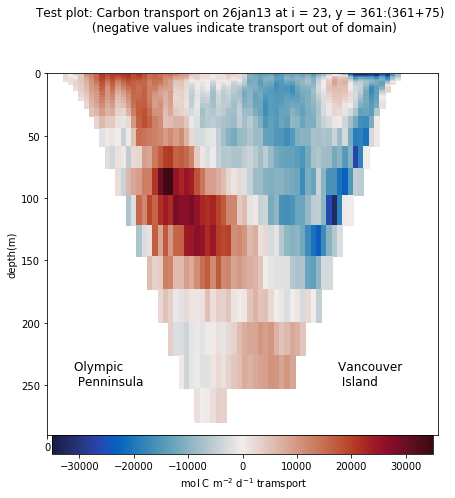

In [107]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10*fact, 10*fact))

section_slice = np.arange(0,75)
tmesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
zlevels = tmesh['gdept_1d'][:]
C_day[C_day == 0 ] = np.nan
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],C_day/slice_ar, cmap = cm.cm.balance, vmin = -35000, vmax = 35000)
ax1.set_ylim([0,290])
ax1.invert_yaxis()
cbar = fig.colorbar(mesh, ax=ax1, orientation = 'horizontal',fraction=0.05, pad=0.0)#, ticks = tticks)
cbar.set_label(label=' mol C m$^{-2}$ d$^{-1}$ tramsport')
ax1.set_title('Test plot: Carbon transport on 26jan13 at i = 23, y = 361:(361+75) \n (negative values indicate transport out of domain)', y=1.1)
ax1.set_ylabel('depth(m)')
#ax1.text(y=250,x=60,'what')
x = 55
y = 250
ax1.text(x, y, 'Vancouver \n Island', fontsize=12)
x = 5
ax1.text(x, y, 'Olympic \n Penninsula', fontsize=12)

## code for extracting daily transports - put into a script of form tr_2013.py and calc for 2013-2019

In [108]:
# yr = 2013
# yrday = 365
# trans_DIC_2013_mol_per_gridcell = np.zeros([365,40,75])

# start =f'{yr}-01-01'
# end =f'{yr}-12-31'

# start_run = arrow.get(start)
# end_run = arrow.get(end)
# arrow_array2 = []

# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array2.append(r)

# for i in range(0,365):

#     tdate = arrow_array2[i][0]
#     yyyy = tdate.format('YYYY')
#     yy = tdate.format('YY')
#     mm = tdate.format('MM')
#     dd = tdate.format('DD')
#     mon = tdate.format('MMM')
#     mon = mon.lower()
#     verbstr = f'{dd}{mon}{yy}'
#     print(verbstr)
    
#     uflx_nc = nc.Dataset(f'/results2/SalishSea/hindcast.201905/{dd}{mon}{yy}/SalishSea_1h_{yyyy}{mm}{dd}_{yyyy}{mm}{dd}_flux_U.nc')
#     carp_nc = nc.Dataset(f'/results2/SalishSea/hindcast.201905/{dd}{mon}{yy}/SalishSea_1h_{yyyy}{mm}{dd}_{yyyy}{mm}{dd}_carp_T.nc')
   

#     # transport in kg/s at the i = 23, j = 361:361+75 boundary
#     u_transport = uflx_nc['u_masstr'][:,:,:,0]
#     # DIC concentration there
#     DIC = carp_nc['dissolved_inorganic_carbon'][:,:,361:(361+75),23]
#     #potential density sigma theta there in kg/L
#     sigma0 = (carp_nc['sigma_theta'][:,:,361:(361+75),23]+1000)/1000
#     #inverse of pot. dense in L/kg
#     inv_sigma0 = 1/sigma0

#     #calculate C mol per hour
#     #mol/umol * umol/L * L/kg * kg/s * s/ hr to get flux per hour
#     C_hr =  1e-6 * DIC * inv_sigma0 * u_transport * (60*60)
#     #sum hourly flux to get umol C/day
#     C_day = np.nansum(C_hr, axis = 0)
#     trans_DIC_2013_mol_per_gridcell[i,:,:] = C_day
    

# pickle.dump(trans_DIC_2013_mol_per_gridcell, open("trans_DIC_2013_mol_per_gridcell.pkl", 'wb'))

### physical transports

In [109]:
# yr = 2019
# yrday = 365
# trans_DIC_2019_mol_per_gridcell = np.zeros([365,40,75])
# start =f'{yr}-01-01'; end =f'{yr}-12-31'

# start_run = arrow.get(start); end_run = arrow.get(end)
# arrow_array2 = []

# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array2.append(r)

# for i in range(0,365):

#     tdate = arrow_array2[i][0]
#     yyyy = tdate.format('YYYY')
#     yy = tdate.format('YY')
#     mm = tdate.format('MM')
#     dd = tdate.format('DD')
#     mon = tdate.format('MMM')
#     mon = mon.lower()
#     verbstr = f'{dd}{mon}{yy}'
#     print(verbstr)
    
#     uflx_nc = nc.Dataset(f'/results2/SalishSea/hindcast.201905/{dd}{mon}{yy}/SalishSea_1h_{yyyy}{mm}{dd}_{yyyy}{mm}{dd}_flux_U.nc')

#     # transport in kg/s at the i = 23, j = 361:361+75 boundary
#     #kg/day
#     u_transport = np.sum(uflx_nc['u_masstr'][:,:,:,0], axis = 0)*(3600)
#     trans_DIC_2019_mol_per_gridcell[i,:,:] = u_transport
    

# pickle.dump(trans_DIC_2019_mol_per_gridcell, open("trans_phys_2019_kg_per_gridcell.pkl", 'wb'))

In [110]:
trans_DIC_2013_mol_per_gridcell = pickle.load(open('./trans_DIC_2013_mol_per_gridcell.pkl', 'rb')) 
trans_DIC_2014_mol_per_gridcell = pickle.load(open('./trans_DIC_2014_mol_per_gridcell.pkl', 'rb'))  
trans_DIC_2015_mol_per_gridcell = pickle.load(open('./trans_DIC_2015_mol_per_gridcell.pkl', 'rb')) 
trans_DIC_2016_mol_per_gridcell = pickle.load(open('./trans_DIC_2016_mol_per_gridcell.pkl', 'rb'))  
trans_DIC_2017_mol_per_gridcell = pickle.load(open('./trans_DIC_2017_mol_per_gridcell.pkl', 'rb')) 
trans_DIC_2018_mol_per_gridcell = pickle.load(open('./trans_DIC_2018_mol_per_gridcell.pkl', 'rb'))
trans_DIC_2019_mol_per_gridcell = pickle.load(open('./trans_DIC_2019_mol_per_gridcell.pkl', 'rb'))

trans_phys_2013_kg_per_gridcell = pickle.load(open('./trans_phys_2013_kg_per_gridcell.pkl', 'rb')) 
trans_phys_2014_kg_per_gridcell = pickle.load(open('./trans_phys_2014_kg_per_gridcell.pkl', 'rb'))  
trans_phys_2015_kg_per_gridcell = pickle.load(open('./trans_phys_2015_kg_per_gridcell.pkl', 'rb')) 
trans_phys_2016_kg_per_gridcell = pickle.load(open('./trans_phys_2016_kg_per_gridcell.pkl', 'rb'))  
trans_phys_2017_kg_per_gridcell = pickle.load(open('./trans_phys_2017_kg_per_gridcell.pkl', 'rb')) 
trans_phys_2018_kg_per_gridcell = pickle.load(open('./trans_phys_2018_kg_per_gridcell.pkl', 'rb'))
trans_phys_2019_kg_per_gridcell = pickle.load(open('./trans_phys_2019_kg_per_gridcell.pkl', 'rb'))

In [111]:
size_ar_masked = slice_ar*grid['umask'][0,:,361:361+75,23]
# print(size_ar_masked[0,:])

size_ar_perrow = np.nansum(size_ar_masked,axis=1)
print(np.shape(size_ar_perrow))

size_ar_pr_bc12 = np.zeros([40,12])

for i in range(0,12):
    size_ar_pr_bc12[:,i] = size_ar_perrow

(40,)


In [112]:
print(np.shape(trans_phys_2013_kg_per_gridcell))

(365, 40, 75)


In [113]:
DIC_flux_stor = np.zeros([7,40,12])
phys_flux_stor = np.zeros([7,40,12])

hinds = [trans_DIC_2013_mol_per_gridcell,trans_DIC_2014_mol_per_gridcell,trans_DIC_2015_mol_per_gridcell,
         trans_DIC_2016_mol_per_gridcell,trans_DIC_2017_mol_per_gridcell,
        trans_DIC_2018_mol_per_gridcell,trans_DIC_2019_mol_per_gridcell]

for yr in range(0,7):
    hind = hinds[yr]
    #print(yr+2013)
    for m in range(0,12):
        #print(m+1)
        hind_month = np.nanmean(hind[m*30:m*30+30,:,:],axis =0)
        #print(np.shape(hind_month))
        for reg in range(1,5):
            DIC_flux_stor[yr,:,m] = np.nansum(hind_month, axis = 1)
            
pickle.dump(DIC_flux_stor, open("DIC_flux_stor.pkl", 'wb'))


hinds = [trans_phys_2013_kg_per_gridcell,trans_phys_2014_kg_per_gridcell,trans_phys_2015_kg_per_gridcell,
         trans_phys_2016_kg_per_gridcell,trans_phys_2017_kg_per_gridcell,
        trans_phys_2018_kg_per_gridcell,trans_phys_2019_kg_per_gridcell]

for yr in range(0,7):
    hind = hinds[yr]
#     print(yr+2013)
    for m in range(0,12):
        #print(m+1)
        hind_month = np.nanmean(hind[m*30:m*30+30,:,:],axis =0)
        #print(np.shape(hind_month))
        for reg in range(1,5):
            phys_flux_stor[yr,:,m] = np.nansum(hind_month, axis = 1)
            
pickle.dump(phys_flux_stor, open("phys_flux_stor.pkl", 'wb'))

## visualising a montly climatology of the physical transports ( in kg/m2/day) with 12 idealized months (30 days each), as well as by-month departures from it

/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in true_divide
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in true_divide
/home/tjarniko/anaconda3/lib/python3.7/site-pa

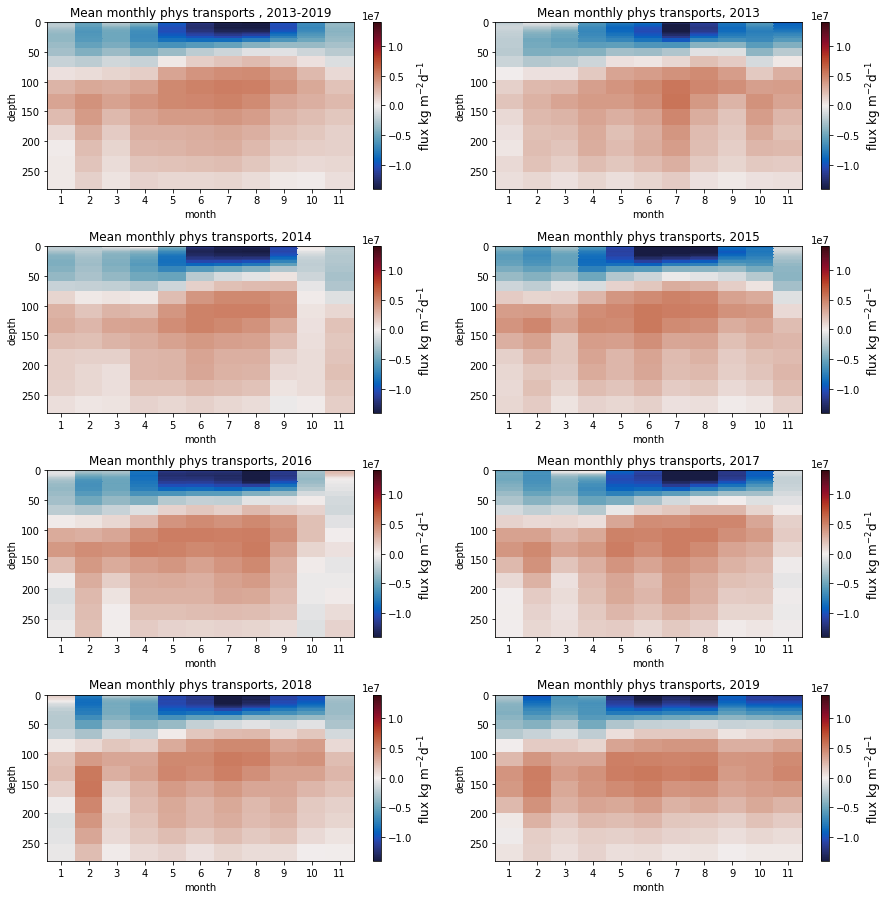

In [114]:
fact = 1.2
fig = plt.figure(figsize=(10.5*fact, 10.5*fact)) 

ax1 = plt.subplot2grid((4,2), (0,0), colspan=1,rowspan = 1)
tdat = np.nanmean(phys_flux_stor[:,:,:],axis=0)
tdat_tp = np.divide(tdat, size_ar_pr_bc12) 
section_slice = np.arange(1,13,1)
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = -1.4e7, vmax = 1.4e7)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly phys transports , 2013-2019')
cbar.set_label('flux kg m$^{-2}$d$^{-1}$', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (0,1), colspan=1,rowspan = 1)
tdat = (phys_flux_stor[0,:,:]); tdat_tp = np.divide(tdat, size_ar_pr_bc12) 
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = -1.4e7, vmax = 1.4e7)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly phys transports, 2013')
cbar.set_label('flux kg m$^{-2}$d$^{-1}$', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (1,0), colspan=1,rowspan = 1)
tdat = (phys_flux_stor[1,:,:]); tdat_tp = np.divide(tdat, size_ar_pr_bc12) 
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = -1.4e7, vmax = 1.4e7)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly phys transports, 2014')
cbar.set_label('flux kg m$^{-2}$d$^{-1}$', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (1,1), colspan=1,rowspan = 1)
tdat = (phys_flux_stor[2,:,:]); tdat_tp = np.divide(tdat, size_ar_pr_bc12) 
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = -1.4e7, vmax = 1.4e7)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly phys transports, 2015')
cbar.set_label('flux kg m$^{-2}$d$^{-1}$', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (2,0), colspan=1,rowspan = 1)
tdat = (phys_flux_stor[3,:,:]); tdat_tp = np.divide(tdat, size_ar_pr_bc12) 
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = -1.4e7, vmax = 1.4e7)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly phys transports, 2016')
cbar.set_label('flux kg m$^{-2}$d$^{-1}$', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (2,1), colspan=1,rowspan = 1)
tdat = (phys_flux_stor[4,:,:]); tdat_tp = np.divide(tdat, size_ar_pr_bc12) 
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = -1.4e7, vmax = 1.4e7)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly phys transports, 2017')
cbar.set_label('flux kg m$^{-2}$d$^{-1}$', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (3,0), colspan=1,rowspan = 1)
tdat = (phys_flux_stor[5,:,:]); tdat_tp = np.divide(tdat, size_ar_pr_bc12) 
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = -1.4e7, vmax = 1.4e7)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly phys transports, 2018')
cbar.set_label('flux kg m$^{-2}$d$^{-1}$', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (3,1), colspan=1,rowspan = 1)
tdat = (phys_flux_stor[6,:,:]); tdat_tp = np.divide(tdat, size_ar_pr_bc12) 
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = -1.4e7, vmax = 1.4e7)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly phys transports, 2019')
cbar.set_label('flux kg m$^{-2}$d$^{-1}$', fontsize = 12)

plt.tight_layout()

/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in true_divide
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in true_divide
/home/tjarniko/anaconda3/lib/python3

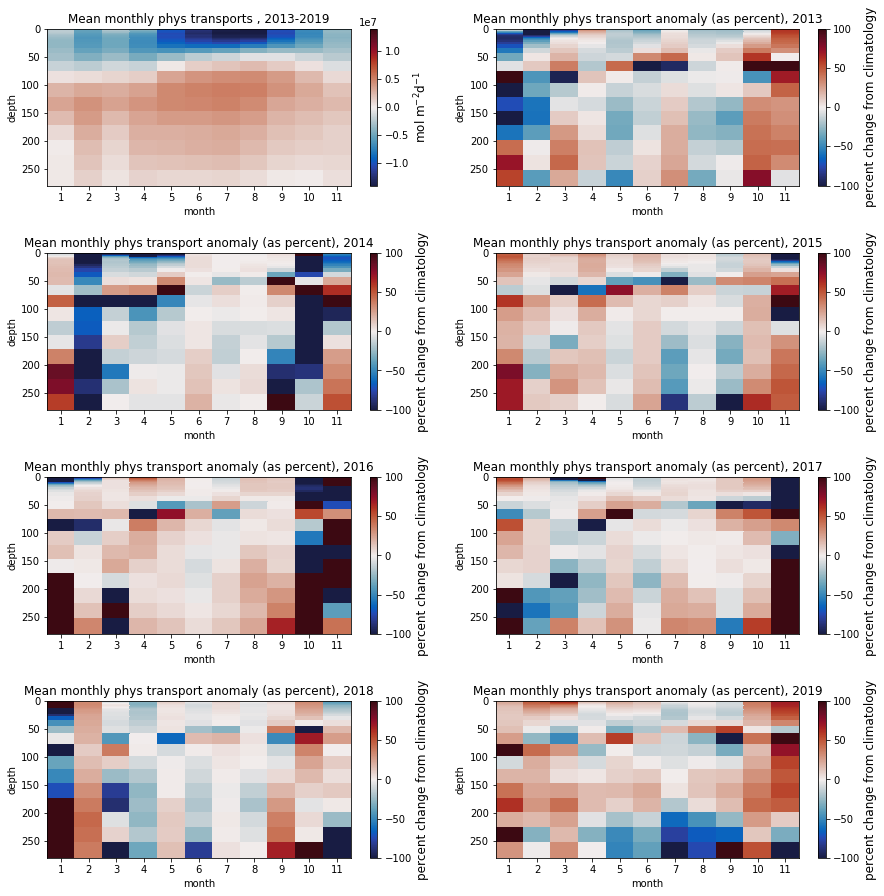

In [115]:
fact = 1.2
fig = plt.figure(figsize=(10.5*fact, 10.5*fact)) 

ax1 = plt.subplot2grid((4,2), (0,0), colspan=1,rowspan = 1)
tdat = np.nanmean(phys_flux_stor[:,:,:],axis=0)
tmean = np.copy(tdat)
tdat_tp = np.divide(tdat, size_ar_pr_bc12) 
section_slice = np.arange(1,13,1)
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = -1.4e7, vmax = 1.4e7)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly phys transports , 2013-2019')
cbar.set_label('mol m$^{-2}$d$^{-1}$', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (0,1), colspan=1,rowspan = 1)
tdat = (phys_flux_stor[0,:,:]); tdat_tp = np.divide((tdat-tmean), tdat) *100
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = -100, vmax = 100)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly phys transport anomaly (as percent), 2013')
cbar.set_label('percent change from climatology', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (1,0), colspan=1,rowspan = 1)
tdat = (phys_flux_stor[1,:,:]); tdat_tp = np.divide((tdat-tmean), tdat) *100
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = -100, vmax = 100)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly phys transport anomaly (as percent), 2014')
cbar.set_label('percent change from climatology', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (1,1), colspan=1,rowspan = 1)
tdat = (phys_flux_stor[2,:,:]); tdat_tp = np.divide((tdat-tmean), tdat) *100
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = -100, vmax = 100)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly phys transport anomaly (as percent), 2015')
cbar.set_label('percent change from climatology', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (2,0), colspan=1,rowspan = 1)
tdat = (phys_flux_stor[3,:,:]); tdat_tp = np.divide((tdat-tmean), tdat) *100
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = -100, vmax = 100)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly phys transport anomaly (as percent), 2016')
cbar.set_label('percent change from climatology', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (2,1), colspan=1,rowspan = 1)
tdat = (phys_flux_stor[4,:,:]); tdat_tp = np.divide((tdat-tmean), tdat) *100
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = -100, vmax = 100)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly phys transport anomaly (as percent), 2017')
cbar.set_label('percent change from climatology', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (3,0), colspan=1,rowspan = 1)
tdat = (phys_flux_stor[5,:,:]); tdat_tp = np.divide((tdat-tmean), tdat) *100
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = -100, vmax = 100)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly phys transport anomaly (as percent), 2018')
cbar.set_label('percent change from climatology', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (3,1), colspan=1,rowspan = 1)
tdat = (phys_flux_stor[6,:,:]); tdat_tp = np.divide((tdat-tmean), tdat) *100
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = -100, vmax = 100)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly phys transport anomaly (as percent), 2019')
cbar.set_label('percent change from climatology', fontsize = 12)





plt.tight_layout()

## same for DIC

/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in true_divide
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in true_divide
/home/tjarniko/anaconda3/lib/python3.7/site-pa

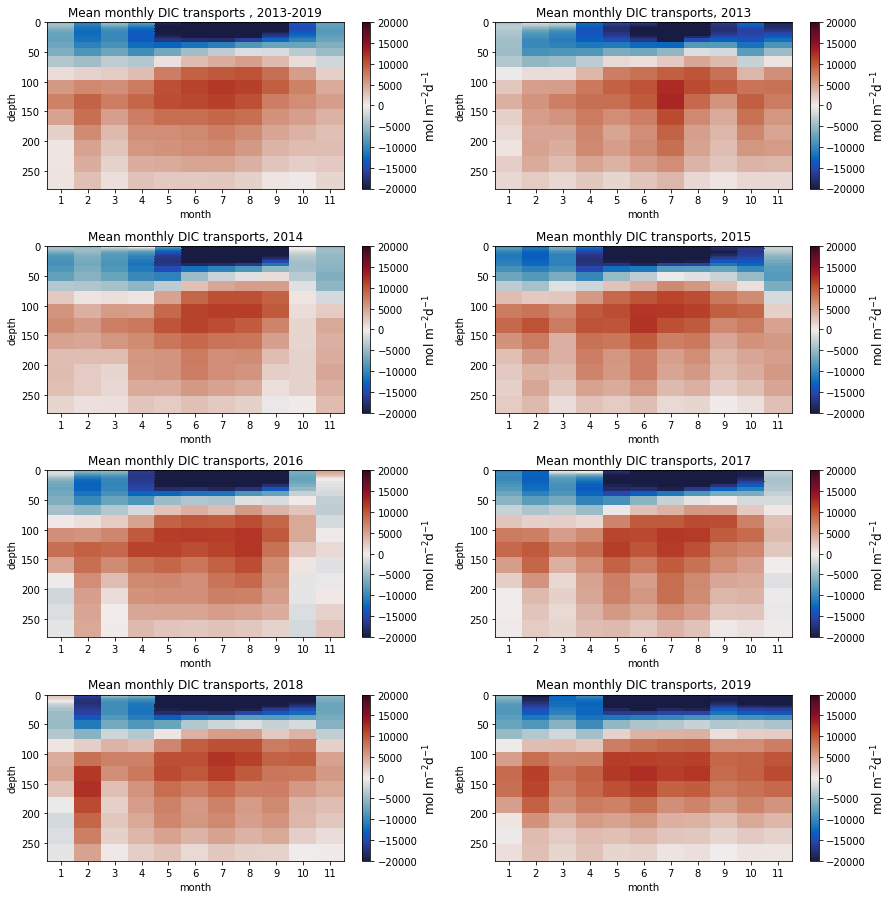

In [116]:
fact = 1.2
fig = plt.figure(figsize=(10.5*fact, 10.5*fact)) 

ax1 = plt.subplot2grid((4,2), (0,0), colspan=1,rowspan = 1)
tdat = np.nanmean(DIC_flux_stor[:,:,:],axis=0)
tdat_tp = np.divide(tdat, size_ar_pr_bc12) 
section_slice = np.arange(1,13,1)
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = -2e4, vmax = 2e4)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly DIC transports , 2013-2019')
cbar.set_label('mol m$^{-2}$d$^{-1}$', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (0,1), colspan=1,rowspan = 1)
tdat = (DIC_flux_stor[0,:,:]); tdat_tp = np.divide(tdat, size_ar_pr_bc12) 
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = -2e4, vmax = 2e4)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly DIC transports, 2013')
cbar.set_label('mol m$^{-2}$d$^{-1}$', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (1,0), colspan=1,rowspan = 1)
tdat = (DIC_flux_stor[1,:,:]); tdat_tp = np.divide(tdat, size_ar_pr_bc12) 
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = -2e4, vmax = 2e4)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly DIC transports, 2014')
cbar.set_label('mol m$^{-2}$d$^{-1}$', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (1,1), colspan=1,rowspan = 1)
tdat = (DIC_flux_stor[2,:,:]); tdat_tp = np.divide(tdat, size_ar_pr_bc12) 
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = -2e4, vmax = 2e4)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly DIC transports, 2015')
cbar.set_label('mol m$^{-2}$d$^{-1}$', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (2,0), colspan=1,rowspan = 1)
tdat = (DIC_flux_stor[3,:,:]); tdat_tp = np.divide(tdat, size_ar_pr_bc12) 
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = -2e4, vmax = 2e4)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly DIC transports, 2016')
cbar.set_label('mol m$^{-2}$d$^{-1}$', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (2,1), colspan=1,rowspan = 1)
tdat = (DIC_flux_stor[4,:,:]); tdat_tp = np.divide(tdat, size_ar_pr_bc12) 
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = -2e4, vmax = 2e4)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly DIC transports, 2017')
cbar.set_label('mol m$^{-2}$d$^{-1}$', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (3,0), colspan=1,rowspan = 1)
tdat = (DIC_flux_stor[5,:,:]); tdat_tp = np.divide(tdat, size_ar_pr_bc12) 
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = -2e4, vmax = 2e4)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly DIC transports, 2018')
cbar.set_label('mol m$^{-2}$d$^{-1}$', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (3,1), colspan=1,rowspan = 1)
tdat = (DIC_flux_stor[6,:,:]); tdat_tp = np.divide(tdat, size_ar_pr_bc12) 
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = -2e4, vmax = 2e4)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly DIC transports, 2019')
cbar.set_label('mol m$^{-2}$d$^{-1}$', fontsize = 12)

plt.tight_layout()

In [117]:
print(np.shape(tdat))

(40, 12)


/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in true_divide
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in true_divide
/home/tjarniko/anaconda3/lib/python3

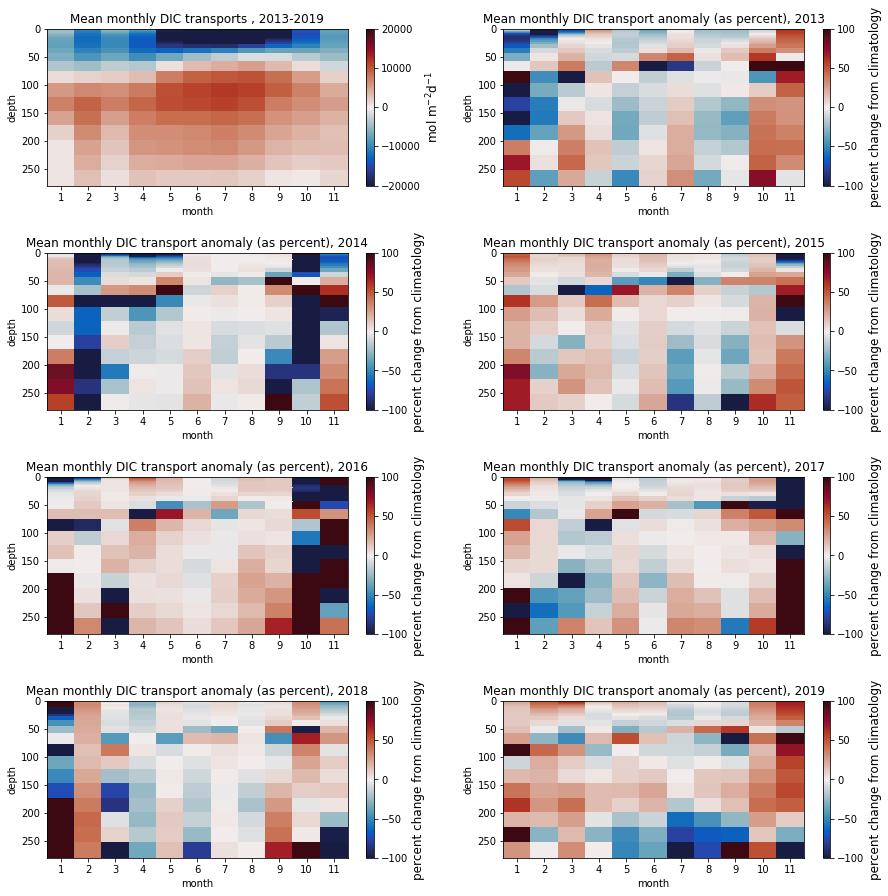

In [118]:
fact = 1.2
fig = plt.figure(figsize=(10.5*fact, 10.5*fact)) 

ax1 = plt.subplot2grid((4,2), (0,0), colspan=1,rowspan = 1)
tdat = np.nanmean(DIC_flux_stor[:,:,:],axis=0)
tmean = np.copy(tdat)
tdat_tp = np.divide(tdat, size_ar_pr_bc12) 
section_slice = np.arange(1,13,1)
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = -2e4, vmax = 2e4)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly DIC transports , 2013-2019')
cbar.set_label('mol m$^{-2}$d$^{-1}$', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (0,1), colspan=1,rowspan = 1)
tdat = (DIC_flux_stor[0,:,:]); tdat_tp = np.divide((tdat-tmean), tdat) *100
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = -100, vmax = 100)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly DIC transport anomaly (as percent), 2013')
cbar.set_label('percent change from climatology', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (1,0), colspan=1,rowspan = 1)
tdat = (DIC_flux_stor[1,:,:]); tdat_tp = np.divide((tdat-tmean), tdat) *100
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = -100, vmax = 100)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly DIC transport anomaly (as percent), 2014')
cbar.set_label('percent change from climatology', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (1,1), colspan=1,rowspan = 1)
tdat = (DIC_flux_stor[2,:,:]); tdat_tp = np.divide((tdat-tmean), tdat) *100
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = -100, vmax = 100)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly DIC transport anomaly (as percent), 2015')
cbar.set_label('percent change from climatology', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (2,0), colspan=1,rowspan = 1)
tdat = (DIC_flux_stor[3,:,:]); tdat_tp = np.divide((tdat-tmean), tdat) *100
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = -100, vmax = 100)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly DIC transport anomaly (as percent), 2016')
cbar.set_label('percent change from climatology', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (2,1), colspan=1,rowspan = 1)
tdat = (DIC_flux_stor[4,:,:]); tdat_tp = np.divide((tdat-tmean), tdat) *100
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = -100, vmax = 100)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly DIC transport anomaly (as percent), 2017')
cbar.set_label('percent change from climatology', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (3,0), colspan=1,rowspan = 1)
tdat = (DIC_flux_stor[5,:,:]); tdat_tp = np.divide((tdat-tmean), tdat) *100
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = -100, vmax = 100)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly DIC transport anomaly (as percent), 2018')
cbar.set_label('percent change from climatology', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (3,1), colspan=1,rowspan = 1)
tdat = (DIC_flux_stor[6,:,:]); tdat_tp = np.divide((tdat-tmean), tdat) *100
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = -100, vmax = 100)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly DIC transport anomaly (as percent), 2019')
cbar.set_label('percent change from climatology', fontsize = 12)





plt.tight_layout()

In [119]:
print(np.arange)

<built-in function arange>


In [120]:
trans_DIC_2013 = np.zeros([365]);trans_DIC_2014 = np.zeros([365])
trans_DIC_2015 = np.zeros([365]);trans_DIC_2016 = np.zeros([365])
trans_DIC_2017 = np.zeros([365]);trans_DIC_2018 = np.zeros([365])
trans_DIC_2019 = np.zeros([365]);

for i in range(0,365):
    trans_DIC_2013[i] = np.nansum(trans_DIC_2013_mol_per_gridcell[i,:,:])
    trans_DIC_2014[i] = np.nansum(trans_DIC_2014_mol_per_gridcell[i,:,:])
    trans_DIC_2015[i] = np.nansum(trans_DIC_2015_mol_per_gridcell[i,:,:])
    trans_DIC_2016[i] = np.nansum(trans_DIC_2016_mol_per_gridcell[i,:,:])
    trans_DIC_2017[i] = np.nansum(trans_DIC_2017_mol_per_gridcell[i,:,:])
    trans_DIC_2018[i] = np.nansum(trans_DIC_2018_mol_per_gridcell[i,:,:])
    trans_DIC_2019[i] = np.nansum(trans_DIC_2019_mol_per_gridcell[i,:,:])
    
trans_phys_2013 = np.zeros([365]);trans_phys_2014 = np.zeros([365])
trans_phys_2015 = np.zeros([365]);trans_phys_2016 = np.zeros([365])
trans_phys_2017 = np.zeros([365]);trans_phys_2018 = np.zeros([365])
trans_phys_2019 = np.zeros([365]);

for i in range(0,365):
    trans_phys_2013[i] = np.nansum(trans_phys_2013_kg_per_gridcell[i,:,:])
    trans_phys_2014[i] = np.nansum(trans_phys_2014_kg_per_gridcell[i,:,:])
    trans_phys_2015[i] = np.nansum(trans_phys_2015_kg_per_gridcell[i,:,:])
    trans_phys_2016[i] = np.nansum(trans_phys_2016_kg_per_gridcell[i,:,:])
    trans_phys_2017[i] = np.nansum(trans_phys_2017_kg_per_gridcell[i,:,:])
    trans_phys_2018[i] = np.nansum(trans_phys_2018_kg_per_gridcell[i,:,:])
    trans_phys_2019[i] = np.nansum(trans_phys_2019_kg_per_gridcell[i,:,:])

## physical fluxes

(40, 12)


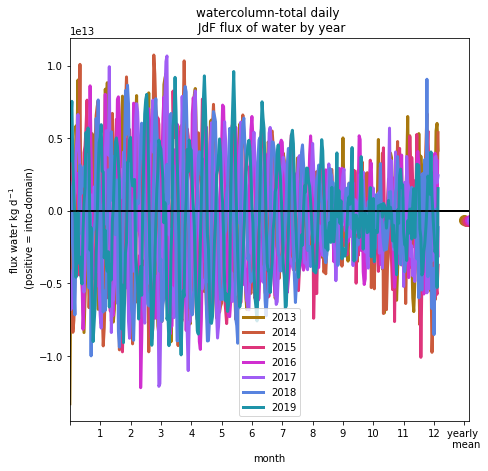

In [121]:
tcmap = cm.cm.phase

fact = 0.7
fig = plt.figure(figsize=( 9*2*fact,9.5*fact)) 

trans = [trans_phys_2013,trans_phys_2014,trans_phys_2015,trans_phys_2016,
        trans_phys_2017,trans_phys_2018,trans_phys_2019]

ax1 = plt.subplot2grid((1,2), (0,0), colspan=1,rowspan = 1)

print(np.shape(tdat))
for i in range(0,7):
    ax1.plot(np.arange(0,len(trans[i]),1),trans[i],linewidth = 3, \
             color = tcmap(i/9), label = str(i+2013))
    ax1.plot(390+i*2, np.nanmean(trans[i]), color = tcmap(i/9), marker = 'o', markersize = 10)
    ax1.set_xlim([0,395]); ax1.axhline(y=0,color = 'k'); ax1.legend(); ax1.set_xlabel('month')
ax1.set_title('watercolumn-total daily \n JdF flux of water by year')
ax1.set_ylabel('flux water kg d$^{-1}$ \n (positive = into-domain)')
ax1.set_xticks(np.arange(0,420,30))
ax1.set_xticklabels(['','1','2','3','4','5','6','7','8','9','10','11','12','yearly \n mean'])
plt.tight_layout()


(40, 12)


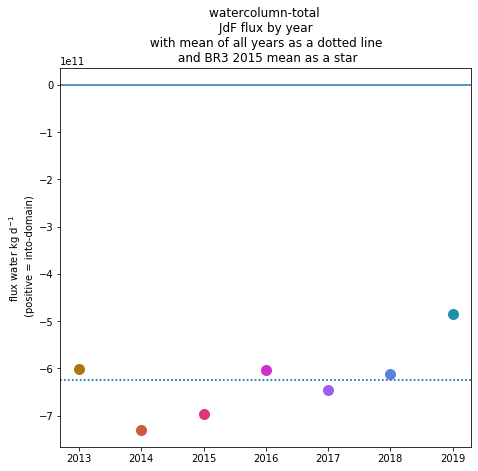

In [122]:
tcmap = cm.cm.phase

fact = 0.7
fig = plt.figure(figsize=( 9*2*fact,9.5*fact)) 

trans = [trans_phys_2013,trans_phys_2014,trans_phys_2015,trans_phys_2016,
        trans_phys_2017,trans_phys_2018,trans_phys_2019]

ax1 = plt.subplot2grid((1,2), (0,0), colspan=1,rowspan = 1)

means = np.arange(0,7,1)
print(np.shape(tdat))
for i in range(0,7):
    
    ax1.plot(i+2013, np.nanmean(trans[i]), color = tcmap(i/9), marker = 'o', markersize = 10)
    means[i] = np.nanmean(trans[i])
ax1.axhline(y = np.nanmean(means), linestyle =':')
ax1.axhline(y = np.nanmean(means), linestyle =':')
ax1.axhline(y = 0, linestyle ='-')
#ax1.plot(2015,-173.3e9/365/rati,color = tcmap(3/9), marker = '*', markersize = 10)
    #ax1.set_xlim([0,395]); ax1.axhline(y=0,color = 'k'); ax1.legend(); ax1.set_xlabel('month')
ax1.set_title('watercolumn-total \n JdF flux by year \n with mean of all years as a dotted line \n and BR3 2015 mean as a star')
ax1.set_ylabel('flux water kg d$^{-1}$ \n (positive = into-domain)')
plt.tight_layout()


## dic fluxes

(40, 12)


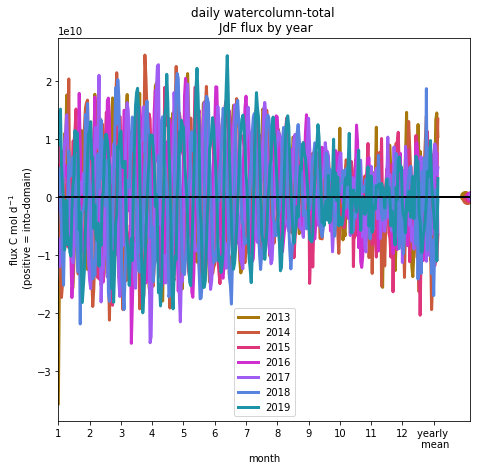

In [123]:
tcmap = cm.cm.phase

fact = 0.7
fig = plt.figure(figsize=( 9*2*fact,9.5*fact)) 

trans = [trans_DIC_2013,trans_DIC_2014,trans_DIC_2015,trans_DIC_2016,
        trans_DIC_2017,trans_DIC_2018,trans_DIC_2019]

ax1 = plt.subplot2grid((1,2), (0,0), colspan=1,rowspan = 1)

print(np.shape(tdat))
for i in range(0,7):
    ax1.plot(np.arange(0,len(trans[i]),1),trans[i],linewidth = 3, \
             color = tcmap(i/9), label = str(i+2013))
    ax1.plot(390+i*2, np.nanmean(trans[i]), color = tcmap(i/9), marker = 'o', markersize = 10)
    ax1.set_xlim([0,395]); ax1.axhline(y=0,color = 'k'); ax1.legend(); ax1.set_xlabel('month')
ax1.set_title('daily watercolumn-total \n JdF flux by year')
ax1.set_ylabel('flux C mol d$^{-1}$ \n (positive = into-domain)')
ax1.set_xticks(np.arange(0,390,30))
ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12','yearly \n mean'])
plt.tight_layout()


(40, 12)


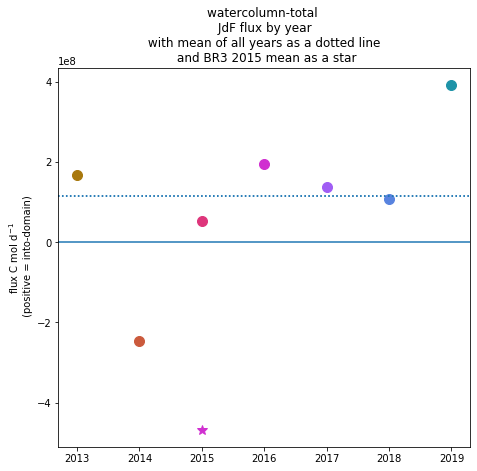

In [124]:
tcmap = cm.cm.phase

fact = 0.7
fig = plt.figure(figsize=( 9*2*fact,9.5*fact)) 

trans = [trans_DIC_2013,trans_DIC_2014,trans_DIC_2015,trans_DIC_2016,
        trans_DIC_2017,trans_DIC_2018,trans_DIC_2019]

ax1 = plt.subplot2grid((1,2), (0,0), colspan=1,rowspan = 1)

means = np.arange(0,7,1)
print(np.shape(tdat))
for i in range(0,7):
    
    ax1.plot(i+2013, np.nanmean(trans[i]), color = tcmap(i/9), marker = 'o', markersize = 10)
    means[i] = np.nanmean(trans[i])
ax1.axhline(y = np.nanmean(means), linestyle =':')
ax1.axhline(y = np.nanmean(means), linestyle =':')
ax1.axhline(y = 0, linestyle ='-')
ax1.plot(2015,-173.3e9/365/rati,color = tcmap(3/9), marker = '*', markersize = 10)
    #ax1.set_xlim([0,395]); ax1.axhline(y=0,color = 'k'); ax1.legend(); ax1.set_xlabel('month')
ax1.set_title('watercolumn-total \n JdF flux by year \n with mean of all years as a dotted line \n and BR3 2015 mean as a star')
ax1.set_ylabel('flux C mol d$^{-1}$ \n (positive = into-domain)')
plt.tight_layout()


In [125]:
ulength = (grid['e2u'][0,361:(361+75),20])

udep = grid['e3u_0'][0,:,361:(361+75),20]


slice_ar2 = np.zeros([40,75])

for i in range(0,40):
    
    slice_ar2[i,:] = ulength * udep[i,:] 
    
slice_ar2 = slice_ar2*grid['umask'][0,:,361:361+75,20]
slice_ar = slice_ar * grid['umask'][0,:,361:361+75,20]
print(np.sum(slice_ar2))
print(np.sum(slice_ar))

rati = np.sum(slice_ar2)/np.sum(slice_ar)
print(rati)

4553873.834940253
4480154.464802936
1.0164546492127609


In [126]:
-173.3e9/365

-474794520.5479452

(7, 12)


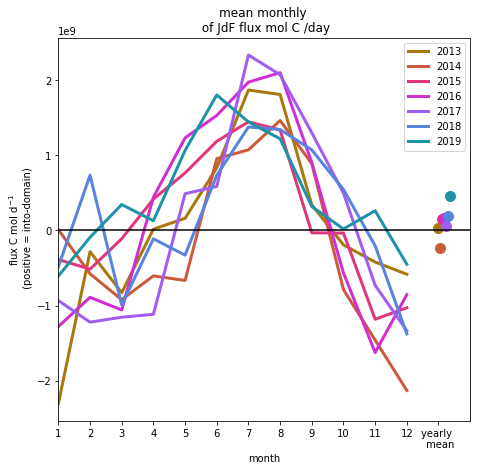

In [127]:
tcmap = cm.cm.phase

fact = 0.7
fig = plt.figure(figsize=( 9*2*fact,9.5*fact)) 

ax1 = plt.subplot2grid((1,2), (0,0), colspan=1,rowspan = 1)
tdat = np.nansum(DIC_flux_stor[:,:,:],axis=1)
print(np.shape(tdat))
#colors = ['k','orange','green','fuchsia']; labels = ['JDF','N. Strait','C. Strait','Tidal \n Mixing']
for i in range(0,7):
    ax1.plot(np.arange(1,13,1),tdat[i,:],linewidth = 3, color = tcmap(i/9), label = str(i+2013))
    ax1.plot(13+i*0.06,np.nanmean(tdat[i]),marker = 'o', markersize = 10, color = tcmap(i/9))
ax1.set_xlim([1,14]); ax1.axhline(y=0,color = 'k'); ax1.legend(); ax1.set_xlabel('month')
ax1.set_title('mean monthly \n of JdF flux mol C /day')
ax1.set_ylabel('flux C mol d$^{-1}$ \n (positive = into-domain)')
ax1.set_xticks(np.arange(1,14,1))
ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12','yearly \n mean'])
plt.tight_layout()


(7, 12)


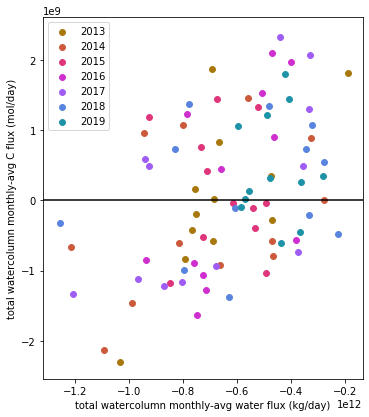

In [131]:
tcmap = cm.cm.phase

fact = 0.7
fig = plt.figure(figsize=( 9*2*fact,9.5*fact)) 

ax1 = plt.subplot2grid((1,2), (0,0), colspan=1,rowspan = 1)
tdat = np.nansum(DIC_flux_stor[:,:,:],axis=1)
tdat2 = np.nansum(phys_flux_stor[:,:,:],axis=1)
print(np.shape(tdat))
#colors = ['k','orange','green','fuchsia']; labels = ['JDF','N. Strait','C. Strait','Tidal \n Mixing']
for i in range(0,7):
        ax1.scatter(tdat2[i,:],tdat[i,:],marker = 'o', color = tcmap(i/9),s = 35, label = str(i+2013))

ax1.axhline(y=0,color = 'k')
ax1.set_xlabel('total watercolumn monthly-avg water flux (kg/day)')
ax1.set_ylabel('total watercolumn monthly-avg C flux (mol/day)')
ax1.legend()
    # ax1.set_xlim([1,14]); ; ax1.legend(); ax1.set_xlabel('month')
# ax1.set_title('mean monthly \n of JdF flux mol C /day')
# ax1.set_ylabel('flux C mol d$^{-1}$ \n (positive = into-domain)')
# ax1.set_xticks(np.arange(1,14,1))
# ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12','yearly \n mean'])
# plt.tight_layout()
